# Julia Basics

This document is derived from [JuliaBox's tutorial](https://github.com/JuliaComputing/JuliaBoxTutorials/tree/master/introductory-tutorials/intro-to-julia).

Julia is a dynamic language.  You don't need type declarations, and can change variable types dynamically and interactively.

For working with simple numbers, arrays, and strings, its syntax is *superficially* similar to Matlab, Python, and other popular languages.

In order to execute the "In" cells, select the cell and press Shift-Enter, or press the Play button above. To run the entire notebook, navigate to Cell and then click Run All.

The Jupyter Notebook can mix code, multimedia results, headings, documentation, equations like $\sqrt{\int x^2 dx}$, and even interactive widgets.

Julia documentation https://docs.julialang.org/en/stable/ is a very useful reference.

In the Jupyter Notebook Enter the command mode by Esc. Use `Esc+h` for help.   One useful command is `Esc+l`, which toggles the **line number**.

In this class, everyone who chooses to use Julia **MUST use Julia v1.2.0**

**Last revision**: 8/28/2019

In [1]:
A = rand(10,300)

10×300 Array{Float64,2}:
 0.0733934  0.857925   0.796095    …  0.883375   0.193695  0.8728  
 0.304033   0.341742   0.453886       0.176681   0.849927  0.702215
 0.172676   0.456521   0.856449       0.337385   0.306095  0.564877
 0.354207   0.0714823  0.842693       0.775725   0.838081  0.726115
 0.472611   0.753814   0.00408611     0.388412   0.900873  0.461888
 0.394262   0.880079   0.797493    …  0.342548   0.144557  0.709671
 0.711502   0.273283   0.989821       0.705982   0.708989  0.798058
 0.184132   0.391207   0.233612       0.684848   0.343793  0.728796
 0.747737   0.58344    0.547786       0.0709929  0.575734  0.464312
 0.641      0.846251   0.292591       0.401938   0.134665  0.662385

It has all of the usual built-in Matlab/Numpy-like linear-algebra and vector functions:

In [2]:
# Basic linear algebra routines are in the LinearAlgebra package (no need to install separately)
using LinearAlgebra


b = rand(10) # a random rank-10 vector
x = A \ b    # solve for x satisfying A*x = b; has rank 300
B = A' * A   # A-transpose multiplied by A; is a 300x300 symmetrix matrix with real eigenvalues
eB = eigvals(B)

300-element Array{Float64,1}:
  -2.8164834375659873e-13
  -2.294498092914405e-13 
  -1.9706663286249403e-13
  -1.8467823822438095e-13
  -1.5939916558849071e-13
  -1.3948197325770667e-13
  -9.61242909152789e-14  
  -6.593492167644133e-14 
  -6.176333977207708e-14 
  -5.08401797739673e-14  
  -4.634522070955448e-14 
  -4.294567039205476e-14 
  -3.7381452506809196e-14
   ⋮                     
   2.2056157581555303e-13
   3.1384285798781987e-13
  17.87687253912064      
  21.664681406510198     
  22.061370834445427     
  22.936575438769356     
  24.043011585322827     
  26.572777674875294     
  28.366694557960777     
  29.84960315966823      
  30.633467883417417     
 806.2465792370565       

It also supports convenient vectorisation of functions using the `.` operator:

In [3]:
#]add SpecialFunctions
using SpecialFunctions

println(size(x))

# @. is a macro that vectorizes the line
# equivalent to adding vectorization to each operation
# eB .- 2x.^2 .+ 4x .- 6

@. eB - 2x^2 + 4x - 6

(300,)


300-element Array{Float64,1}:
  -6.024368139268279 
  -5.925791788628682 
  -6.010606080043487 
  -5.975808564030215 
  -5.9752151069941535
  -6.036243141779555 
  -5.932829352163914 
  -6.027076253671764 
  -5.975623745264314 
  -5.921600071732041 
  -5.993152978255862 
  -5.939688980389247 
  -5.956840845776274 
   ⋮                 
  -5.952553340583022 
  -5.997551433911855 
  11.955694666406387 
  15.665954758879991 
  16.053413851906914 
  16.919150734012902 
  18.084746193024017 
  20.568287218216014 
  22.33715176858085  
  23.88456459657625  
  24.584900993591454 
 800.2588620858659   

Complex numbers and arbitrary-precision arithmetic (via MPFR) are available, of course.

In [4]:
cos(big(3 + 4im))

-27.03494560307422464769480266827091348467753695567661661019265514673434246483996 - 3.851153334811777536563337123053124569704160846091637003157728595256494186490506im

## Unicode

All strings are UTF-8 encoded Unicode by default (UTF-16 and UTF-32 also supported):

In [5]:
# regex search of a Unicode string
# This replaces the old matchall function
collect((m.match for m = eachmatch(r"\s[a-z]+", "α is a Grëék letter"))) 

3-element Array{SubString{String},1}:
 " is"    
 " a"     
 " letter"

Like Python 3, variable names can be Unicode, but Julia allows a somewhat wider range of codepoints in identifiers, which can be typed by LaTeX-like tab-completion *\hat[TAB]\alpha[TAB]*.

In [6]:
α̂= 7
ħ = 6.62606957e-34 / 2π
ẋ = ħ *α̂

7.3820020773540256e-34

Unlike Python 3, Unicode math operators are parsed as infix operators, which are available for user-defined meanings:

In [7]:
≪(x,y) = x < 0.1*y
50 ≪ 100, 5 ≪ 100, 5 ≤ 50

(false, true, true)

In [8]:
const ⊗ = kron

# Note that eye(N,N) is deprecated for representing the identity matrix

Matrix(I,2,2) ⊗ rand(2,2)

4×4 Array{Float64,2}:
 0.588447  0.258055  0.0       0.0     
 0.206334  0.463273  0.0       0.0     
 0.0       0.0       0.588447  0.258055
 0.0       0.0       0.206334  0.463273

## Functions and JIT-compilation

Functions can be defined in several ways, and *don't require type-declarations*.

In [9]:
# verbose form:
function foo(x)
    return x + 1
end

# one-line form:
foobar(x) = x + 2

# anonymous function
x -> x + 3

#5 (generic function with 1 method)

In [10]:
foo(3) # compiles foo for Int arguments

4

In [11]:
foo(7) # re-uses compiled foo(Int)

8

In [12]:
foo(7.3) # compiles a different version for Float64 arguments

8.3

In [13]:
# Use vectorization

@. foo([1,2,7,9]) 

4-element Array{Int64,1}:
  2
  3
  8
 10

# Plotting in Julia

We will use the PyPlot package to plot with Julia. This notebook has a few examples to get you started. The [PyPlot.jl](https://github.com/stevengj/PyPlot.jl) site has excellent documentation for plotting.

Loading the PyPlot module may take a few seconds.

In general, all of the arguments, including keyword arguments, are exactly the same as in Python. (With minor translations, of course, e.g. Julia uses `true` and `nothing` instead of Python's `True` and `None`.)

The full matplotlib.pyplot API is far too extensive to describe here; see the [matplotlib.pyplot documentation](http://matplotlib.org/api/pyplot_api.html) for more information. The Matplotlib version number is returned by PyPlot.version.


In [14]:
#]add PyPlot
using PyPlot

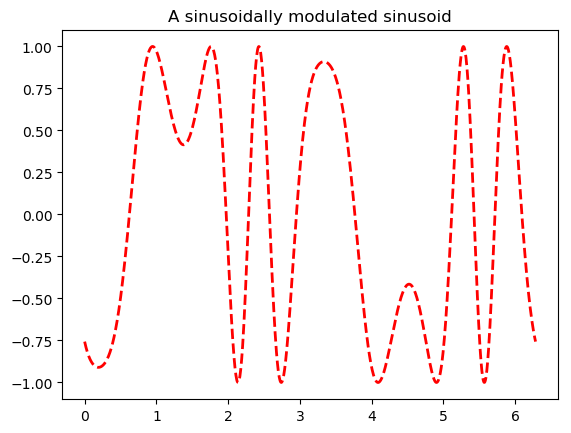

PyObject Text(0.5, 1.0, 'A sinusoidally modulated sinusoid')

In [15]:
# range plays the role of linspace starting from v0.7.0

x = range(0,stop=2*pi,length=1000)
y = similar(x)
@. y = sin(3*x + 4*cos(2*x))

plot(x, y, color="red", linewidth=2.0, linestyle="--")
title("A sinusoidally modulated sinusoid")

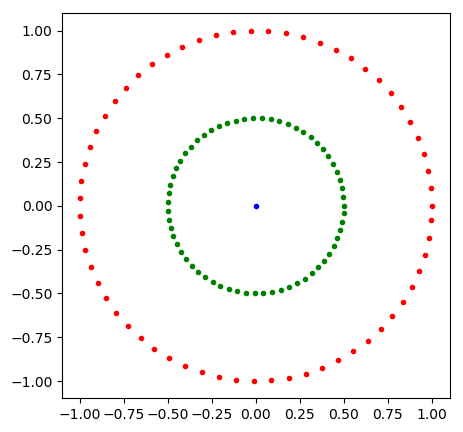

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000003683DB00>

In [16]:
# Draw (x, y) points
figure(figsize=(5, 5))
θ = collect(0:0.1:2π)
plot(0,0,"b.")
plot(cos.(θ), sin.(θ), "r.")
plot(0.5cos.(θ), 0.5sin.(θ), "g.")

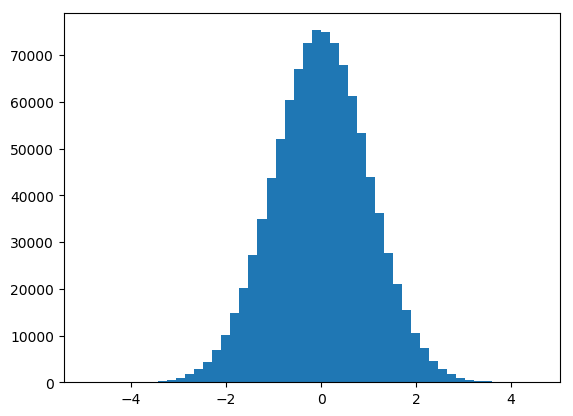

In [17]:
# Draw a histogram

y = randn(10^6)
hist(y, 50);    

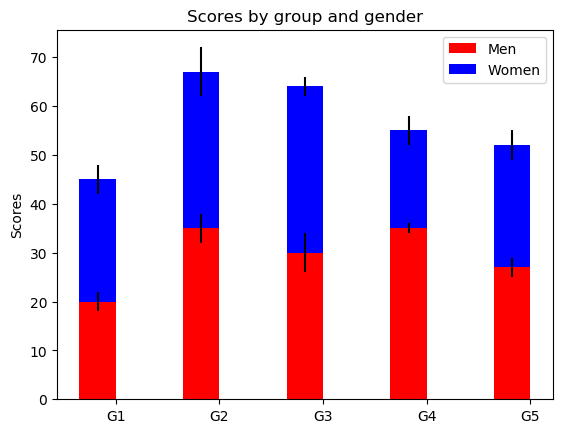

PyObject <matplotlib.legend.Legend object at 0x0000000037FFF128>

In [18]:
# Draw a stacked bar chart

N = 5
menMeans   = (20, 35, 30, 35, 27)
womenMeans = (25, 32, 34, 20, 25)
menStd     = (2, 3, 4, 1, 2)
womenStd   = (3, 5, 2, 3, 3)
ind = 1:N    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = PyPlot.bar(ind, menMeans, width, color="r", yerr=menStd)
p2 = PyPlot.bar(ind, womenMeans, width, bottom=menMeans, color="b", yerr=womenStd)

ylabel("Scores")
title("Scores by group and gender")
xticks(ind .+ width/2., ("G1", "G2", "G3", "G4", "G5") )
legend( (p1[1], p2[1]), ("Men", "Women") )


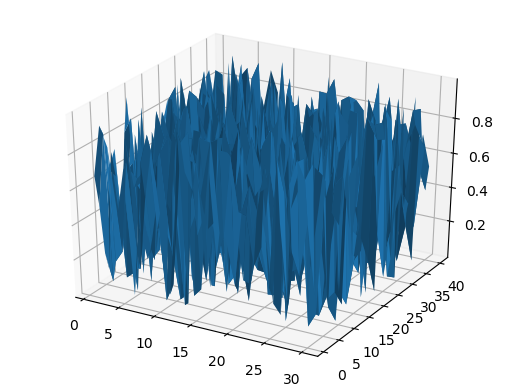

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x00000000380689B0>

In [19]:
# Plot a random surface

surf(rand(30,40))